In [101]:
import numpy as np
import matplotlib.pyplot as plt
import io
from PIL import Image

In [119]:
class SimulatedAnnealing:
    def __init__(self, f, X, T, k_max, gamma):
        self.f = f
        self.X = X
        if not isinstance(self.X, np.ndarray):
            self.X = np.array([X])
        self.T = T
        self.k_max = k_max
        self.gamma = gamma
        self.y = f(X)

        self.values = [self.y] # list of y values
        self.steps = [X] # list of x values
    
    def optimize(self):
        X_best = self.X
        y_best = self.y

        for _ in range(self.k_max):
            # find next config
            x_next = self.X + np.random.normal(0,1,len(self.X))
            y_next = self.f(x_next)
            y_delta = y_next - self.y
            
            # accept or reject
            if y_delta <= 0 or np.exp(-y_delta/self.T) > np.random.rand():
                self.X, self.y = x_next, y_next
            if y_next < y_best:
                X_best, y_best = x_next, y_next
                self.values.append(y_next)
                self.steps.append(x_next)
            
            # exponential cool down
            self.T = self.gamma * self.T
        return X_best

In [163]:
f = lambda x: x[0]**2 - x[1]**2
sa = SimulatedAnnealing(f=f, X=np.random.rand(2), T=100, k_max=200, gamma=0.95)

sa.optimize()

array([ 8.95321389, 76.09640853])

Text(0.5, 1.0, 'y values over iteration')

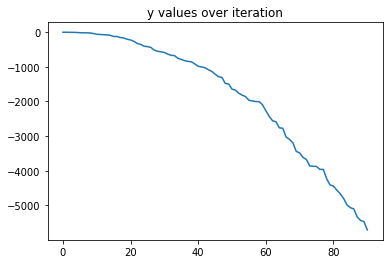

In [164]:
plt.plot(sa.values)
plt.title('y values over iteration')
plt.show()

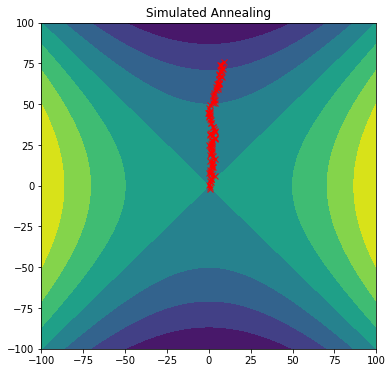

In [165]:
Xs = np.linspace(-100, 100, 100)
Ys = np.linspace(-100, 100, 100)

Xs, Ys = np.meshgrid(Xs, Ys)
Zs = np.apply_along_axis(f, 2, np.stack([Xs, Ys], axis=2))

steps = np.array(sa.steps)

# Plot countour
plt.figure(figsize=(6, 6))
plt.contourf(Xs, Ys, Zs)
# Plot steps taken
plt.plot(steps[:, 0], steps[:, 1], marker='x', color='r');
plt.title('Simulated Annealing')

plt.show()

In [170]:
# Create GIF
steps = np.array(sa.steps)
frames = []
for i in range(steps.shape[0]):
    # Plot
    plt.contourf(Xs, Ys, Zs)
    plt.plot(steps[:i+1, 0], steps[:i+1, 1], marker='x', color='r');
    # Save GIF frame to buffer
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    plt.close()
    buffer.seek(0)
    
    # Load and store frame using PIL
    frame = Image.open(buffer)
    frames.append(frame)
# Save frame
frames[0].save(fp='simulated_annealing.gif', format='GIF',
               append_images=frames, save_all=True, duration=50, loop=0)